## Business Understanding

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem prediksi harga diamonds untuk menjawab permasalahan berikut.

- Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap harga diamonds?
- Berapa harga pasar diamonds dengan karakteristik atau fitur tertentu?

Untuk  menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan tujuan atau goals sebagai berikut:

- Mengetahui fitur yang paling berkorelasi dengan harga diamonds.
- Membuat model machine learning yang dapat memprediksi harga diamonds seakurat mungkin berdasarkan fitur-fitur yang ada.

## Data Understanding

Menggunakan data ini: https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv

## Data Preparation

### Data Loading

In [80]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [47]:
# Load dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### EDA - Deskripsi Variabel
- Apa saja jenis variabel pada dataset?
- Bagaimana distribusi variabel dalam dataset?
- Apakah ada missing value?
- Apakah ada fitur yang tidak berguna (redundant)?
- Bagaimana korelasi antara fitur dan target?

In [13]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari output terlihat bahwa:

- Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### EDA - Menangani Missing Value dan Outliers

In [48]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Kita cek dari kolom z yang memiliki jumlah missing value terbanyak.

In [49]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Pada kasus kita, 20 sampel missing value merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 53.940. 

tidak jadi masalah sebab kita masih memiliki 53.920 sampel lainnya.

In [50]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

<Axes: xlabel='carat'>

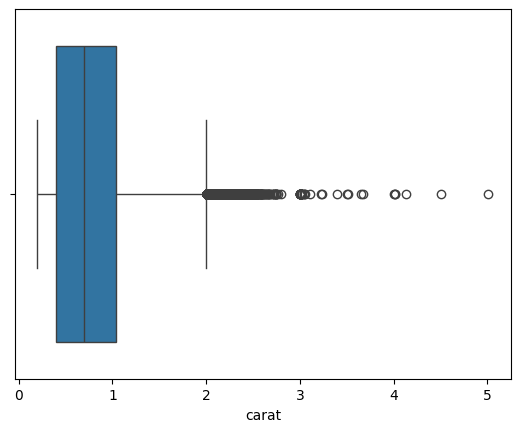

In [51]:
# Visualisasi data Diamonds dengan Boxplot untuk deteksi outliers
# Carat
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

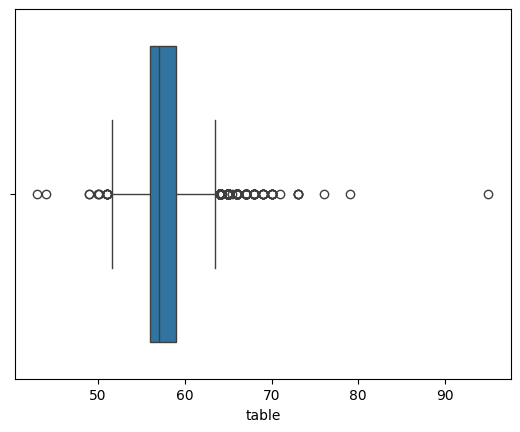

In [52]:
# Visualisasi data Diamonds dengan Boxplot untuk deteksi outliers
# Table
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

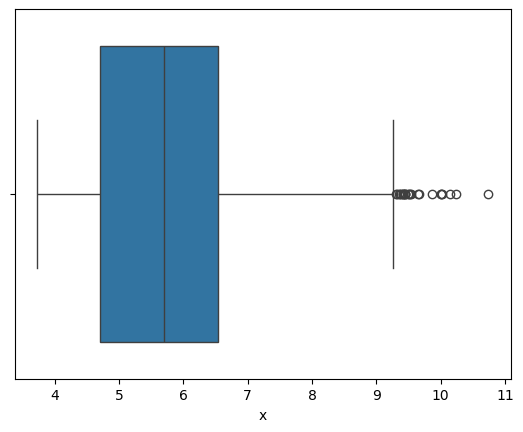

In [53]:
# Visualisasi data Diamonds dengan Boxplot untuk deteksi outliers
# Fitur x
sns.boxplot(x=diamonds['x'])

In [54]:
# Mengatasi outliers dengan metode IQR untuk identifikasi Batas bawah dan batas atas
Q1 = diamonds[['carat', 'table', 'x']].quantile(0.25)
Q3 = diamonds[['carat', 'table', 'x']].quantile(0.75)
IQR = Q3 - Q1
diamonds = diamonds[~((diamonds[['carat', 'table', 'x']] < (Q1 - 1.5 * IQR)) | (diamonds[['carat', 'table', 'x']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

(51469, 10)

<Axes: xlabel='x'>

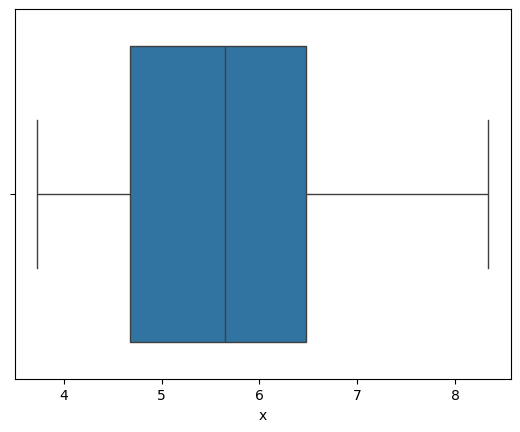

In [14]:
# Fitur x
sns.boxplot(x=diamonds['x'])

### EDA - Univariate Analysis

In [55]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

#### Categorical Features

           jumlah sampel  persentase
cut                                 
Ideal              21074        40.9
Premium            13039        25.3
Very Good          11678        22.7
Good                4408         8.6
Fair                1270         2.5


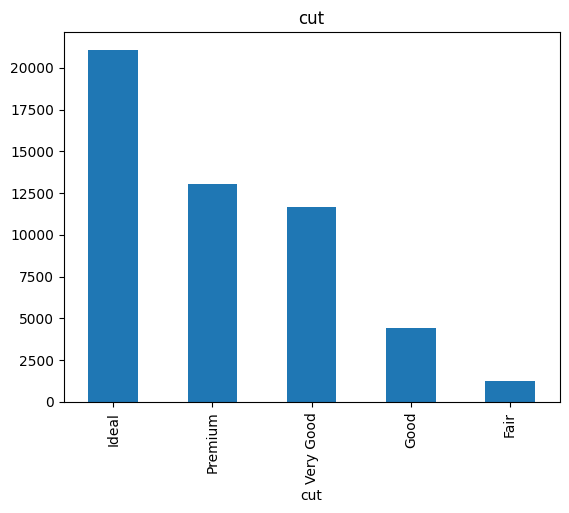

In [56]:
# Fitur cut
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
color                           
G              10969        21.3
E               9601        18.7
F               9301        18.1
H               7750        15.1
D               6661        12.9
I               4801         9.3
J               2386         4.6


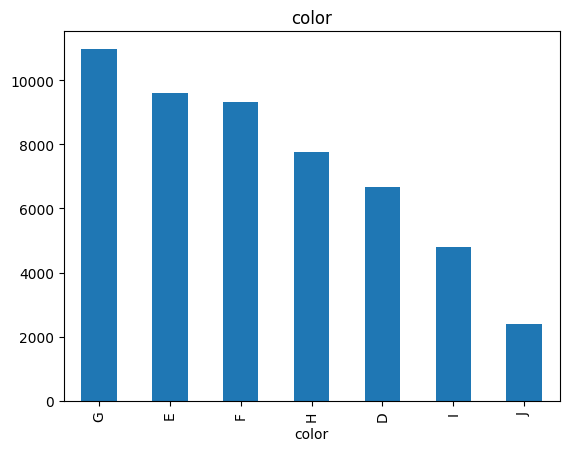

In [57]:
# Fitur Color
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

         jumlah sampel  persentase
clarity                           
SI1              12449        24.2
VS2              11889        23.1
SI2               8086        15.7
VS1               7992        15.5
VVS2              5025         9.8
VVS1              3626         7.0
IF                1781         3.5
I1                 621         1.2


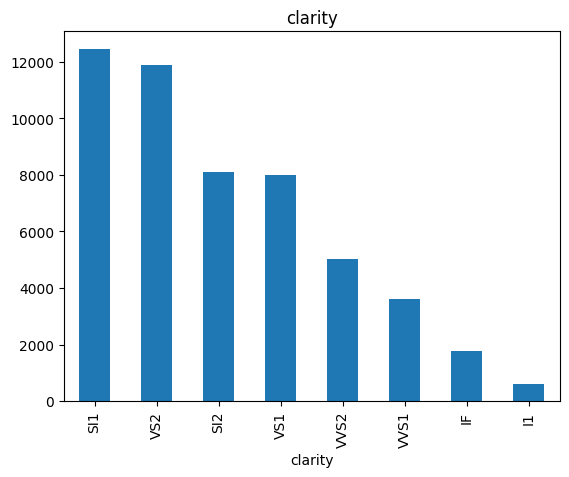

In [58]:
# Fitur Clarity
# Fitur Color
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

'IF' - Internally Flawless 
'VVS2' - Very Very Slight Inclusions 
'VVS1' - Very Very Slight Inclusions 
'VS1' - Very Slight Inclusions
'VS2' - Very Slight Inclusions
'SI2' - Slight Inclusions
'SI1' - Slight Inclusions
'I1' - Imperfect

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

#### Numerical Features

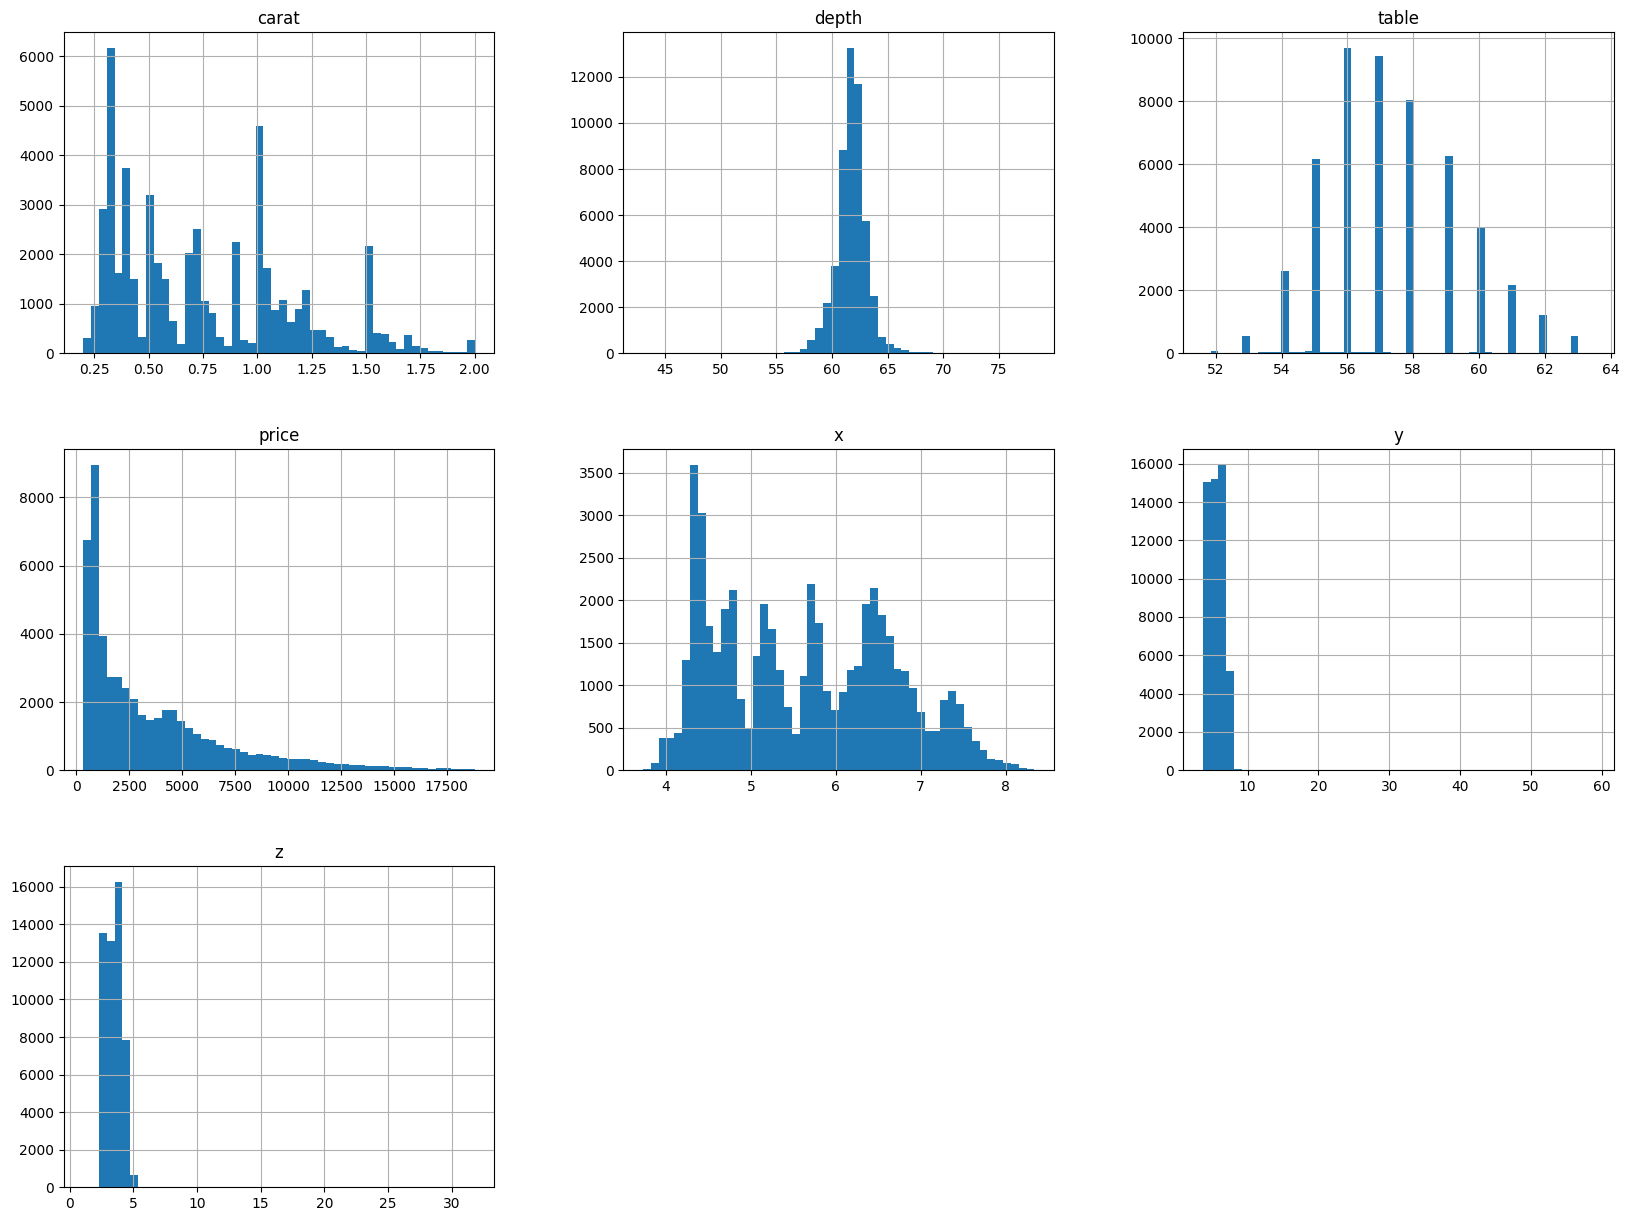

In [19]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

### EDA - Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA.

#### Categorical Features

C:\Users\mr vin\AppData\Local\Temp\ipykernel_5380\545918514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\mr vin\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\mr vin\AppData\Local\Temp\ipykernel_5380\545918514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\mr vin\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has change

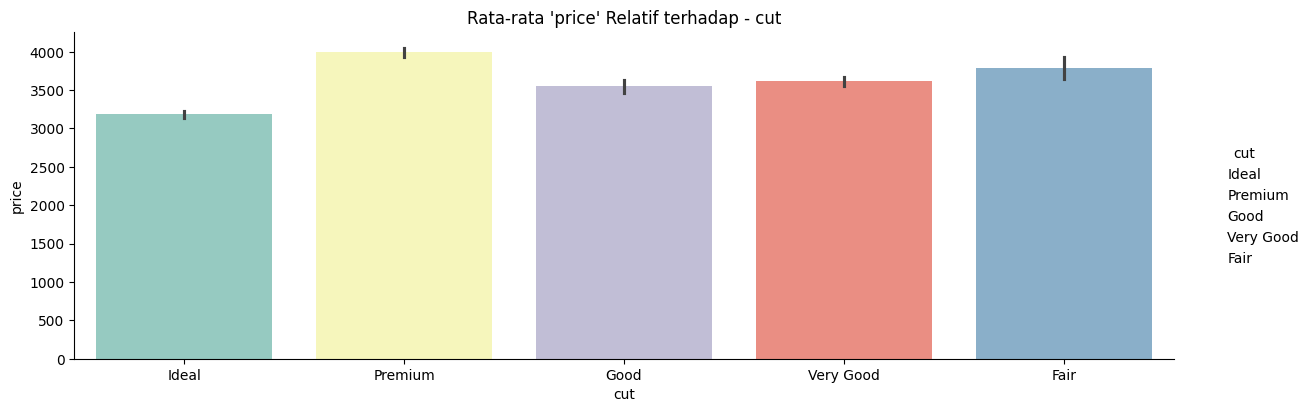

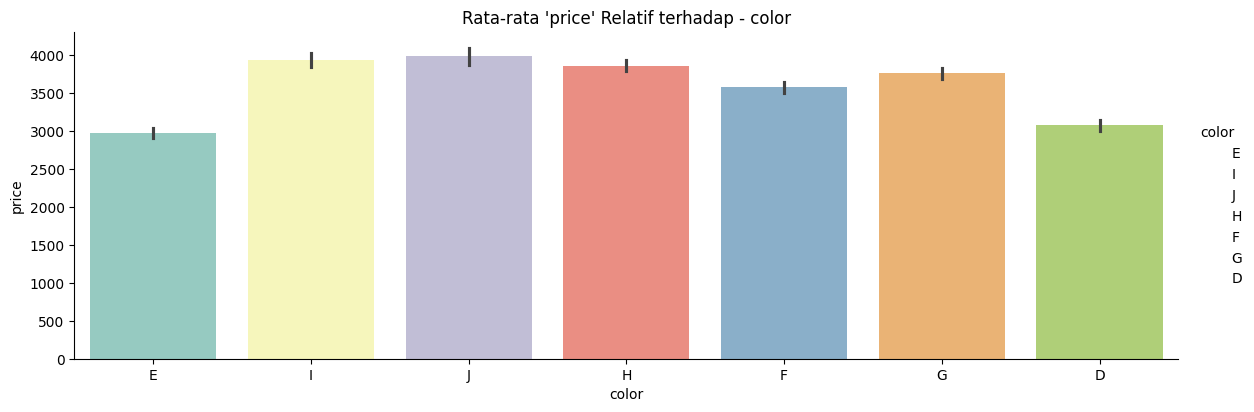

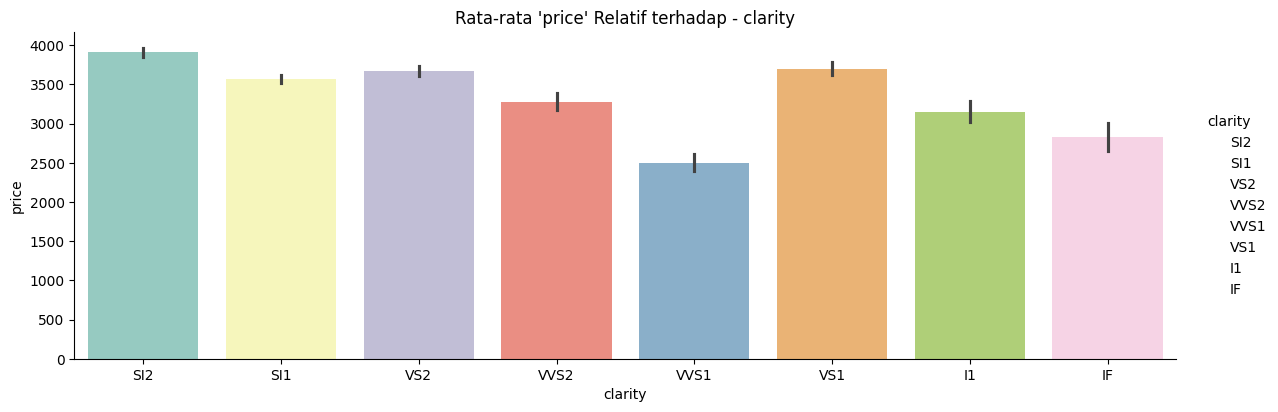

In [59]:
# mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.
cat_features = diamonds.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
- Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

#### Numerical Features

C:\Users\mr vin\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


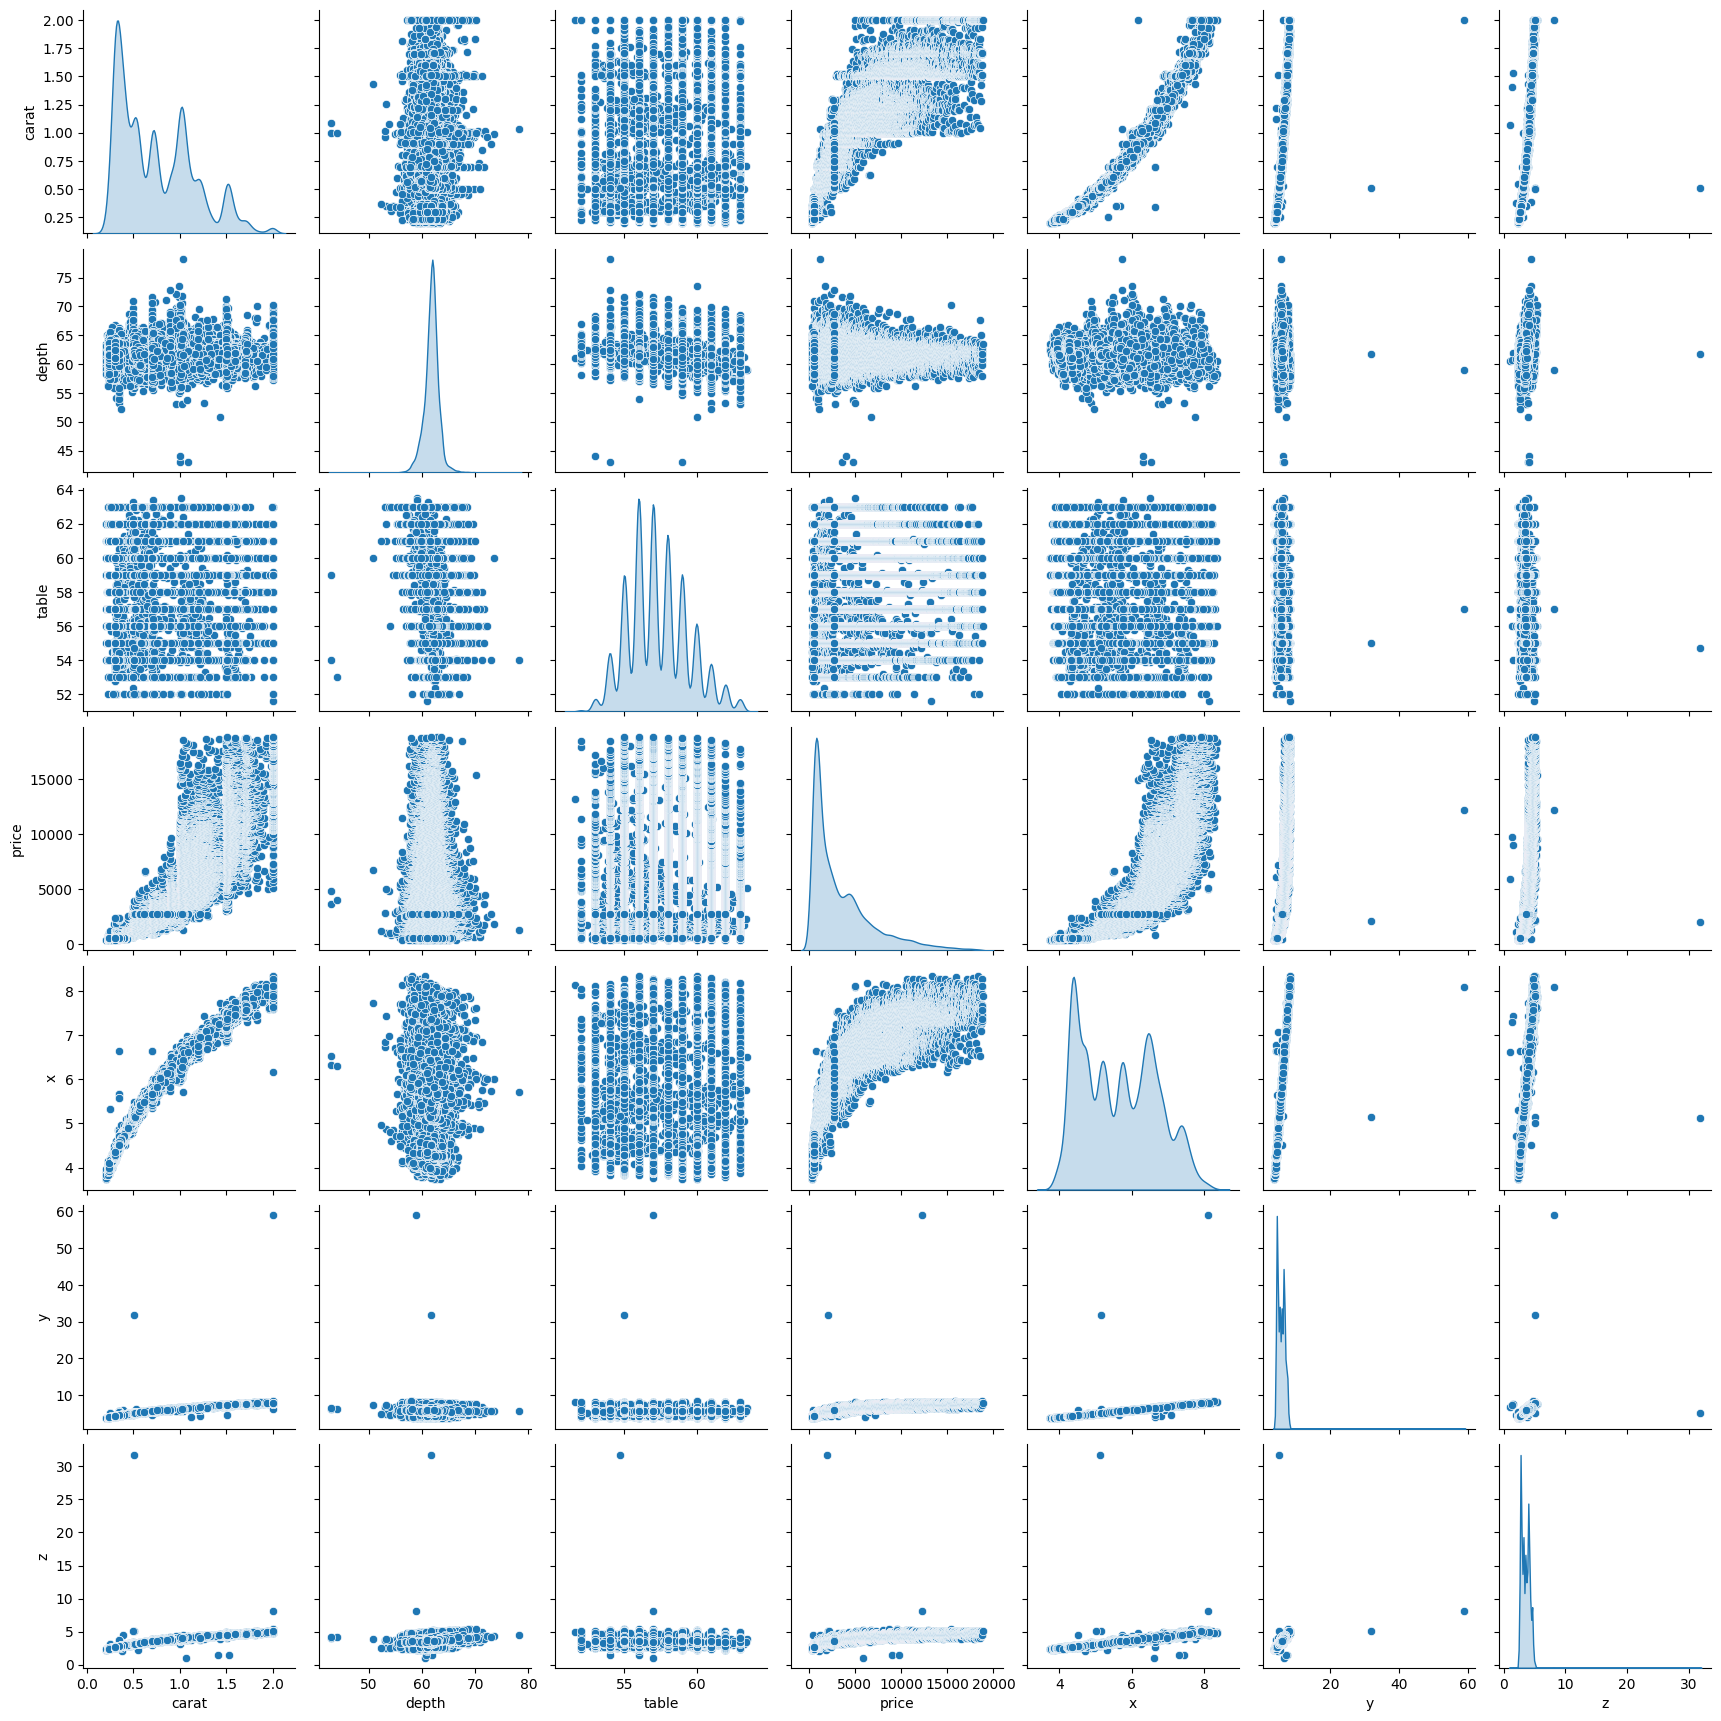

In [60]:
# mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). 
sns.pairplot(diamonds, diag_kind = 'kde')

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu ‘price’. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target ‘price’, dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur ‘price’ berada pada baris keempat (dari atas) sumbu y (ditandai oleh kotak merah). Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target ‘price’ pada baris tersebut saja. |

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

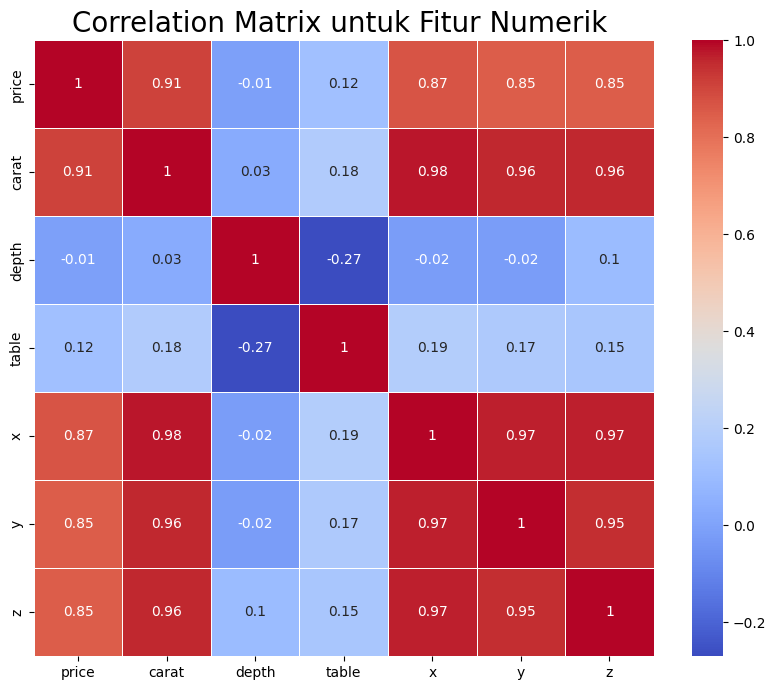

In [61]:
# Mengevaluasi skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [24]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

C:\Users\mr vin\AppData\Local\Temp\ipykernel_5380\2222599575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.drop(['depth'], inplace=True, axis=1)


,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


### Data Preparation

Kita akan melakukan 4 tahap persiapan:
- Encoding fitur kategori
- Reduksi dimensi dengan Principal Component Analysis (PCA)
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi

In [62]:
# Encoding kategori cut, color, clarity dengan fitur get_dumies
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut').astype(int)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color').astype(int)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity').astype(int)], axis=1)

# Drop kolom
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

diamonds.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1


C:\Users\mr vin\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


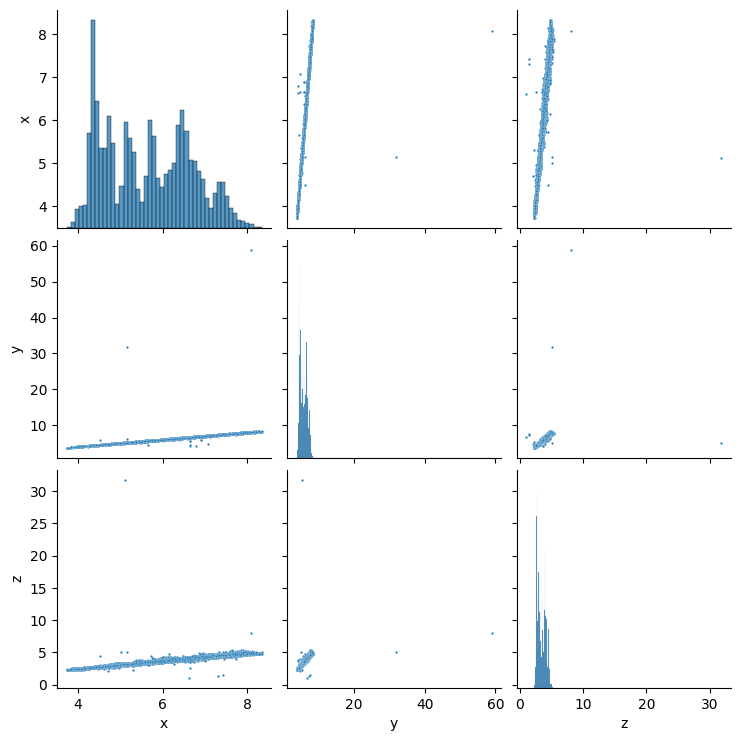

In [63]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

#### Reduksi Dimensi dengan PCA

teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC).

In [65]:
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [66]:
# Cek proporsi informasi dari ketiga komponen tadi
pca.explained_variance_ratio_.round(3)

array([0.978, 0.015, 0.006])

Arti nya adalah 97.8% informasi pada ketiga fitur x, y, z terdapat pada PC pertama. Sedangkan 0.15% dan 0.06% terdapat pada PC kedua dan ketiga.

Membuat fitur baru bernama 'diemnsion' untuk menggantikan fitur x, y, z:
- Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom ‘x’, ‘y’, dan ‘z’.

In [67]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

In [68]:
diamonds.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,61.5,55.0,326,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,-2.588985
1,0.21,59.8,61.0,326,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-2.767057
3,0.29,62.4,58.0,334,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-2.185057
4,0.31,63.3,58.0,335,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.968789
5,0.24,62.8,57.0,336,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,-2.588612


#### Train-Test-Split

In [70]:
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [71]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 51469
Total # of sample in train dataset: 46322
Total # of sample in test dataset: 5147


#### Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. 

- Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori.

 Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, 

In [73]:
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
8582,0.999850,0.798609,0.995757
18060,1.895268,0.798609,1.621508
27389,-0.840732,-0.167791,-0.866594
10040,-1.014842,-0.650991,-1.165127
16138,0.651632,0.315409,0.674508


proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [74]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,46322.0000,46322.0000,46322.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3631,-2.7771,-1.8722
25%,-0.8905,-0.6510,-0.9132
50%,-0.1194,-0.1678,0.0251
75%,0.6765,0.7986,0.8032
max,3.1140,2.9730,24.0946


## Modelling

Akan menggunkaan model machine learning dengan 3 algoritma. Di evaluasi juga mana performa algoritma terbaik.
- K-Nearest Neighbor (KNN)
- Random Forest
- Boosting Algorithm

In [75]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearnest Neighbor (KNN)

Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Pemilihan k sangat penting pada algortima ini dan sangat berpengaruh pada performa model.
- Jika k  terlalu tinggi maka model akan underfit dan prediksinya bias
- Jika k terlalu rendah maka model akan overfit dan hasil prediksinya varians tinggi

btw, k itu range nya 1 - 20 yaw

In [77]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Diberi nama Random Forest karena disusun dari banyak algoritma decision tree yang pembagian data an fiturnya dipilih secara acak. 

- Random Forest termasuk dalam model ensemble bagging atau Boostrap aggregating yang melatih model dengan sampel random

In [79]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

### Boosting Algorithm

Berbeda dengan Random Forest, Boosting Algorithm juga termasul model ensemble boosting. Algoritma ini bekerja dengan membangun model dari data latihan. Model akan saling ditambahkan dari model 1 ke model 2 yang nantinya mencapai jumlah maksimum model untuk ditambahkan.
- Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). 

In [81]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluation

Metriks yang digunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata rata nilai sebenarnya dengan nilai prediksi.

In [82]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [83]:
# Buat variable mse yang isinya adalah dataframe nilai mse data train dan test masing masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn,
              'RF': RF,
              'Boosting': boosting}

# Hitung MSE masing masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3



In [84]:
# Display mse
mse

,train,test
KNN,476.303539,680.053782
RF,69.868287,196.439253
Boosting,1731.90581,1778.048593


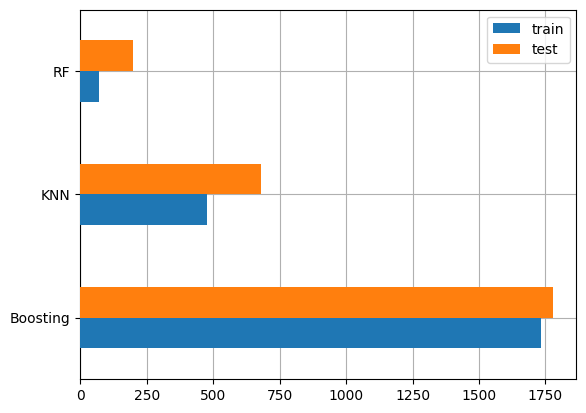

In [85]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800). 
- Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

## Deployment

In [87]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1987,3095,4389.6,3592.4,4122.4


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.